### Smoking and Drinking Dataset with body signal

#### This dataset is collected from National Health Insurance Service in Korea. All personal information and sensitive data were excluded.
#### The purpose of this dataset is to:

##### 1- Analysis of body signal
##### 2- Classification of smoker or drinker

### Importing libraries 

In [64]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
print("Tensor Flow Version: {}".format(tf.__version__))

Tensor Flow Version: 2.15.0


### Load the Dataset


In [65]:
path="C:\\Users\\mybox\\Downloads\\smoking.csv"
filename_read=os.path.join(path,"C:\\Users\\mybox\\Downloads\\smoking.csv")
df = pd.read_csv(filename_read, na_values=['NA', '?'])

### Data Analysis

### Check if there is misssing data

In [66]:
missing_values = df.isnull().sum()

print("Missing Values:\n", missing_values)

if missing_values.sum() == 0:
    print("No missing values in the DataFrame.")
else:
    print("There are missing values in the DataFrame.")

Missing Values:
 sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64
No missing values in the DataFrame.


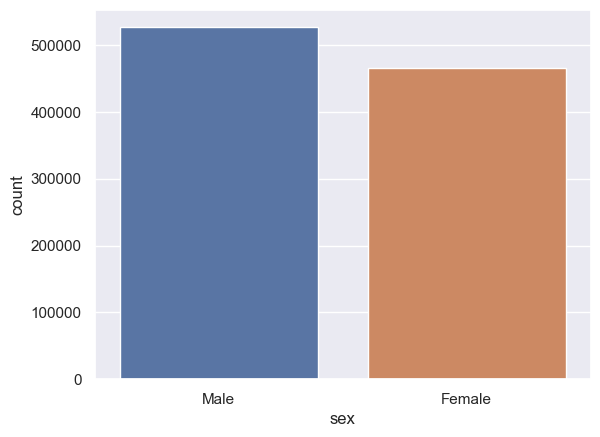

In [67]:
sns.countplot(x="sex", data=df)
plt.show()

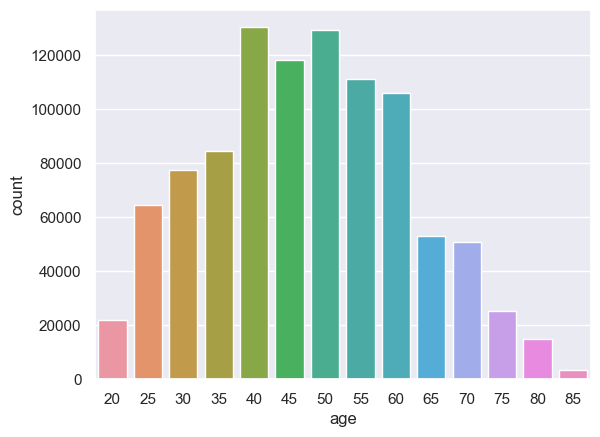

In [68]:
sns.countplot(x="age", data=df)
plt.show()

In [69]:
print(df.describe())

                 age         height         weight      waistline  \
count  991346.000000  991346.000000  991346.000000  991346.000000   
mean       47.614491     162.240625      63.284050      81.233358   
std        14.181339       9.282957      12.514241      11.850323   
min        20.000000     130.000000      25.000000       8.000000   
25%        35.000000     155.000000      55.000000      74.100000   
50%        45.000000     160.000000      60.000000      81.000000   
75%        60.000000     170.000000      70.000000      87.800000   
max        85.000000     190.000000     140.000000     999.000000   

          sight_left    sight_right      hear_left     hear_right  \
count  991346.000000  991346.000000  991346.000000  991346.000000   
mean        0.980834       0.978429       1.031495       1.030476   
std         0.605949       0.604774       0.174650       0.171892   
min         0.100000       0.100000       1.000000       1.000000   
25%         0.700000       0.7000

In [70]:
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1,1,120,...,126,92,17.1,1,1.0,21,35,40,1,Y
1,Male,30,180,80,89.0,0.9,1.2,1,1,130,...,148,121,15.8,1,0.9,20,36,27,3,N
2,Male,40,165,75,91.0,1.2,1.5,1,1,120,...,74,104,15.8,1,0.9,47,32,68,1,N
3,Male,50,175,80,91.0,1.5,1.2,1,1,145,...,104,106,17.6,1,1.1,29,34,18,1,N
4,Male,50,165,60,80.0,1.0,1.2,1,1,138,...,117,104,13.8,1,0.8,19,12,25,1,N


### Checking the data type


In [71]:
df.dtypes

sex                  object
age                   int64
height                int64
weight                int64
waistline           float64
sight_left          float64
sight_right         float64
hear_left             int64
hear_right            int64
SBP                   int64
DBP                   int64
BLDS                  int64
tot_chole             int64
HDL_chole             int64
LDL_chole             int64
triglyceride          int64
hemoglobin          float64
urine_protein         int64
serum_creatinine    float64
SGOT_AST              int64
SGOT_ALT              int64
gamma_GTP             int64
SMK_stat_type_cd      int64
DRK_YN               object
dtype: object

In [72]:
df

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1,1,120,...,126,92,17.1,1,1.0,21,35,40,1,Y
1,Male,30,180,80,89.0,0.9,1.2,1,1,130,...,148,121,15.8,1,0.9,20,36,27,3,N
2,Male,40,165,75,91.0,1.2,1.5,1,1,120,...,74,104,15.8,1,0.9,47,32,68,1,N
3,Male,50,175,80,91.0,1.5,1.2,1,1,145,...,104,106,17.6,1,1.1,29,34,18,1,N
4,Male,50,165,60,80.0,1.0,1.2,1,1,138,...,117,104,13.8,1,0.8,19,12,25,1,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,Male,45,175,80,92.1,1.5,1.5,1,1,114,...,125,132,15.0,1,1.0,26,36,27,1,N
991342,Male,35,170,75,86.0,1.0,1.5,1,1,119,...,84,45,15.8,1,1.1,14,17,15,1,N
991343,Female,40,155,50,68.0,1.0,0.7,1,1,110,...,77,157,14.3,1,0.8,30,27,17,3,Y
991344,Male,25,175,60,72.0,1.5,1.0,1,1,119,...,73,53,14.5,1,0.8,21,14,17,1,N


In [73]:
df.columns

Index(['sex', 'age', 'height', 'weight', 'waistline', 'sight_left',
       'sight_right', 'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS',
       'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin',
       'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT',
       'gamma_GTP', 'SMK_stat_type_cd', 'DRK_YN'],
      dtype='object')

### Splitting the Data

In [74]:
from sklearn.model_selection import train_test_split

train_df, test_df= train_test_split(df, test_size=0.2)

### Data Visualization

### Which sex indulges more in drinking and smoking?

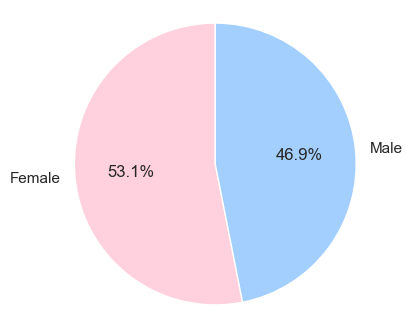

In [75]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(4,4))
plt.pie(df['sex'].value_counts().tolist(),
labels=['Female', 'Male'], colors=['#ffd1df', '#a2cffe'],
autopct = '%1.1f%%', startangle=90)
axis = plt.axis('equal')

### Which age group is most affected?

C:\Users\mybox\AppData\Local\Temp\ipykernel_21644\2355016344.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'],


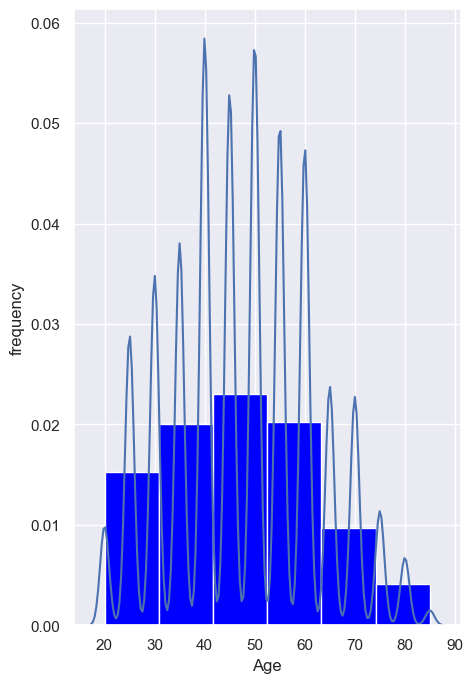

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5,8))
sns.distplot(df['age'],
             hist_kws={'alpha': 1, 'color': 'blue'},
             kde=True, bins=6)
ax=ax.set(ylabel='frequency' , xlabel='Age')


### Intialize and train a Logistic Regression  model 

### For Drinking

In [77]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn.linear_model as sk

# Select the features and target variable
X = df[['age', 'sex']]
y = df['DRK_YN']

encoder = OneHotEncoder(sparse=False)
X_encoded = encoder.fit_transform(X[['sex']])
X_encoded_df = pd.DataFrame(X_encoded, columns=['Female', 'Male'])
X = pd.concat([X, X_encoded_df], axis=1).drop('sex', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train a logistic regression model
logreg = sk.LogisticRegressionCV()
logreg.fit(X_train_scaled, y_train)

# Predict the target variable on the test set
y_pred = logreg.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

c:\Users\mybox\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Accuracy: 0.7006909769506229


### For Smoking

In [78]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn.linear_model as sk

# Select the features and target variable
X = df[['age', 'sex']]
y = df['SMK_stat_type_cd']

encoder = OneHotEncoder(sparse=False)
X_encoded = encoder.fit_transform(X[['sex']])
X_encoded_df = pd.DataFrame(X_encoded, columns=['Female', 'Male'])
X = pd.concat([X, X_encoded_df], axis=1).drop('sex', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train a logistic regression model
logreg = sk.LogisticRegressionCV()
logreg.fit(X_train_scaled, y_train)

# Predict the target variable on the test set
y_pred = logreg.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

c:\Users\mybox\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Accuracy: 0.6695364906440712


### Filter data based on SMK_stat_type_cd values

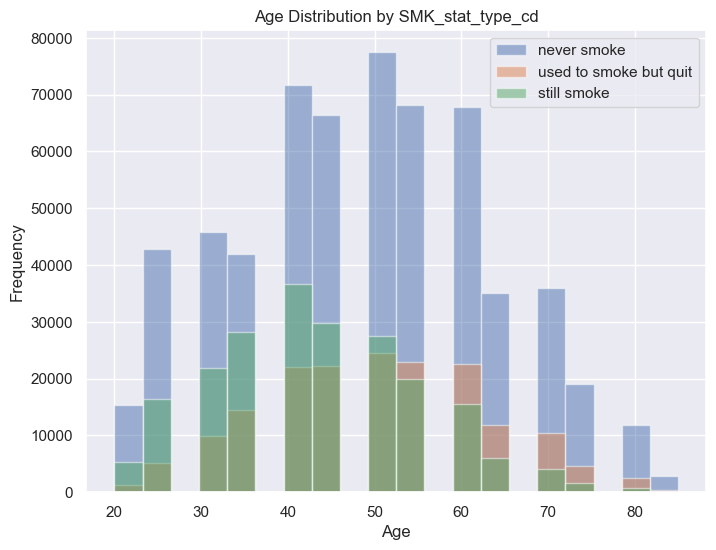

In [79]:
smk_1 = df[df['SMK_stat_type_cd'] == 1]
smk_2 = df[df['SMK_stat_type_cd'] == 2]
smk_3 = df[df['SMK_stat_type_cd'] == 3]

# Plotting
plt.figure(figsize=(8, 6))
plt.hist(smk_1['age'], bins=20, alpha=0.5, label='never smoke')
plt.hist(smk_2['age'], bins=20, alpha=0.5, label='used to smoke but quit')
plt.hist(smk_3['age'], bins=20, alpha=0.5, label='still smoke')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution by SMK_stat_type_cd')
plt.legend()
plt.show()

### Filter data based on DRK_YN values

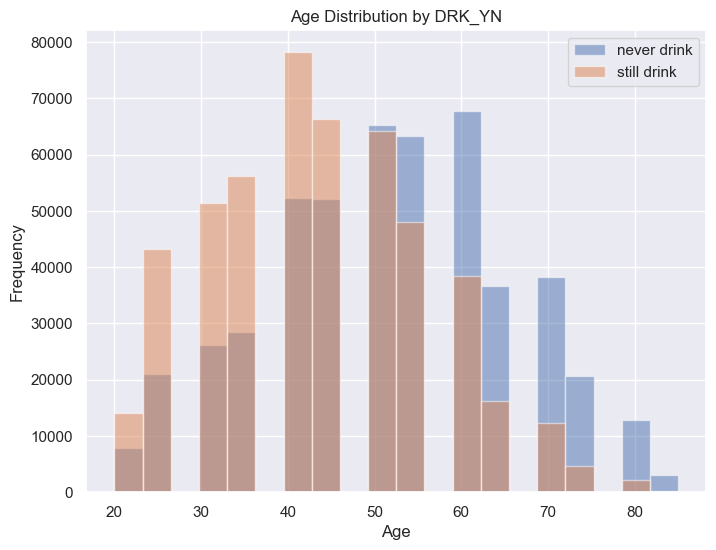

Unique values in 'DRK_YN': ['Y' 'N']


In [80]:
drk_1 = df[df['DRK_YN'] == 'N']
drk_2 = df[df['DRK_YN'] == 'Y']

plt.figure(figsize=(8, 6))
plt.hist(drk_1['age'], bins=20, alpha=0.5, label='never drink')
plt.hist(drk_2['age'], bins=20, alpha=0.5, label='still drink')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution by DRK_YN')
plt.legend()
plt.show()

print("Unique values in 'DRK_YN':", df['DRK_YN'].unique())


### Initialize and train a Random Forest classifier for Drinking

In [81]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = df[['age', 'sex']]
y = df['DRK_YN']

encoder = OneHotEncoder(sparse=False)
X_encoded = encoder.fit_transform(X[['sex']])
X_encoded_df = pd.DataFrame(X_encoded, columns=['Female', 'Male'])
X = pd.concat([X, X_encoded_df], axis=1).drop('sex', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

c:\Users\mybox\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Accuracy: 0.7022595450648106


### Initialize and train a Random Forest classifier for smoking 

In [82]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = df[['age', 'sex']]
y = df['SMK_stat_type_cd']

encoder = OneHotEncoder(sparse=False)
X_encoded = encoder.fit_transform(X[['sex']])
X_encoded_df = pd.DataFrame(X_encoded, columns=['Female', 'Male'])
X = pd.concat([X, X_encoded_df], axis=1).drop('sex', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

c:\Users\mybox\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Accuracy: 0.6731325969637363


### Neural Network

In [83]:
X = df[['age', 'sex']]
y = df['SMK_stat_type_cd']

encoder = OneHotEncoder(sparse=False)
X_encoded = encoder.fit_transform(X[['sex']])
X_encoded_df = pd.DataFrame(X_encoded, columns=['Female', 'Male'])
X = pd.concat([X, X_encoded_df], axis=1).drop('sex', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#opt = keras.optimizers.SGD(learning_rate=0.01)
#model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
#model.summary()

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')


c:\Users\mybox\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(




Epoch 1/10


24784/24784 [==============================] - 47s 2ms/step - loss: -8318070.5000 - accuracy: 0.6075 - val_loss: -29752552.0000 - val_accuracy: 0.6082
Epoch 2/10
24784/24784 [==============================] - 48s 2ms/step - loss: -97224592.0000 - accuracy: 0.6076 - val_loss: -196574448.0000 - val_accuracy: 0.6082
Epoch 3/10
24784/24784 [==============================] - 49s 2ms/step - loss: -380533088.0000 - accuracy: 0.6076 - val_loss: -612969792.0000 - val_accuracy: 0.6082
Epoch 4/10
24784/24784 [==============================] - 52s 2ms/step - loss: -969500352.0000 - accuracy: 0.6076 - val_loss: -1390261760.0000 - val_accuracy: 0.6082
Epoch 5/10
24784/24784 [==============================] - 49s 2ms/step - loss: -1976120960.0000 - accuracy: 0.6076 - val_loss: -2639040768.0000 - val_accuracy: 0.6082
Epoch 6/10
24784/24784 [==============================] - 49s 2ms/step - loss: -3512470784.0000 - accuracy: 0.6076 - val_loss: -4471419392.0000 - val_accuracy: 0.6082
Epoch

In [84]:
X = df[['age', 'sex']]
y = df['DRK_YN']

encoder = OneHotEncoder(sparse=False)
X_encoded = encoder.fit_transform(X[['sex']])
X_encoded_df = pd.DataFrame(X_encoded, columns=['Female', 'Male'])
X = pd.concat([X, X_encoded_df], axis=1).drop('sex', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#opt = keras.optimizers.SGD(learning_rate=0.01)
#model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
#model.summary()

# Train the model
model.fit(X_train_scaled, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test_encoded))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_scaled, y_test_encoded)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')


c:\Users\mybox\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/10
24784/24784 [==============================] - 47s 2ms/step - loss: 0.5770 - accuracy: 0.7028 - val_loss: 0.5765 - val_accuracy: 0.7023
Epoch 2/10
24784/24784 [==============================] - 46s 2ms/step - loss: 0.5765 - accuracy: 0.7030 - val_loss: 0.5768 - val_accuracy: 0.7023
Epoch 3/10
24784/24784 [==============================] - 48s 2ms/step - loss: 0.5764 - accuracy: 0.7032 - val_loss: 0.5769 - val_accuracy: 0.7023
Epoch 4/10
24784/24784 [==============================] - 45s 2ms/step - loss: 0.5763 - accuracy: 0.7032 - val_loss: 0.5768 - val_accuracy: 0.7013
Epoch 5/10
24784/24784 [==============================] - 44s 2ms/step - loss: 0.5763 - accuracy: 0.7032 - val_loss: 0.5766 - val_accuracy: 0.7023
Epoch 6/10
24784/24784 [==============================] - 44s 2ms/step - loss: 0.5763 - accuracy: 0.7032 - val_loss: 0.5766 - val_accuracy: 0.7023
Epoch 7/10
24784/24784 [==============================] - 45s 2ms/step - loss: 0.5762 - accuracy: 0.7032 - val_loss: 0

### Outlier Detection 
 The array of scatter plots shows as a visual analysis for the main objective of exploring and  connections among the independent variables and the target variable "DRK_YN."

Figure(400x400) {26} {0.9999737730318173}


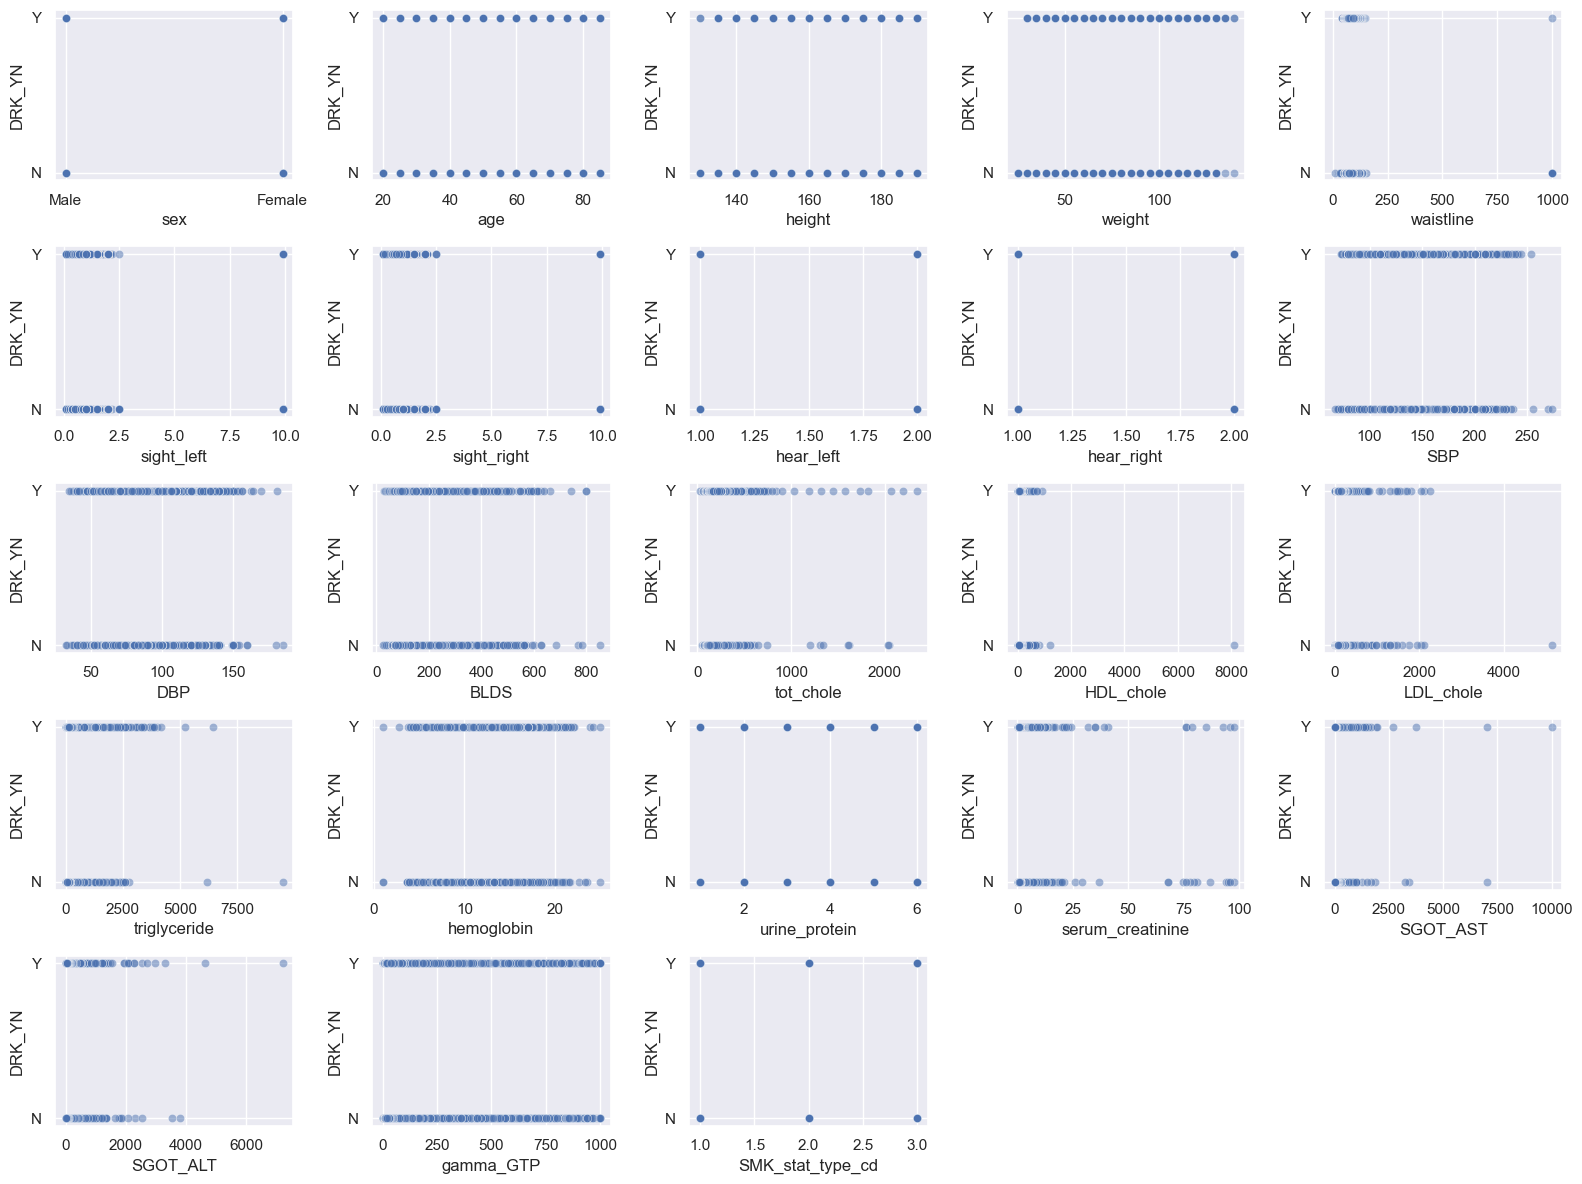

In [85]:
df_with_duplicates = df.shape[0]
df = df.drop_duplicates()
df_without_duplicates = df.shape[0]

print(
    f, {df_with_duplicates-df_without_duplicates}, {(df_without_duplicates/df_with_duplicates)}
)
columns_to_check = df.columns[:-1]

num_rows = 5
num_cols = 5

num_plots = min(len(columns_to_check), num_rows * num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 12))

axes = axes.flatten()

sns.set(style="darkgrid")

for i in range(num_plots):
    column = columns_to_check[i]
    sns.scatterplot(data=df, x=column, y="DRK_YN", alpha=0.5, ax=axes[i])
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("DRK_YN")

for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

###  Same for Smoking

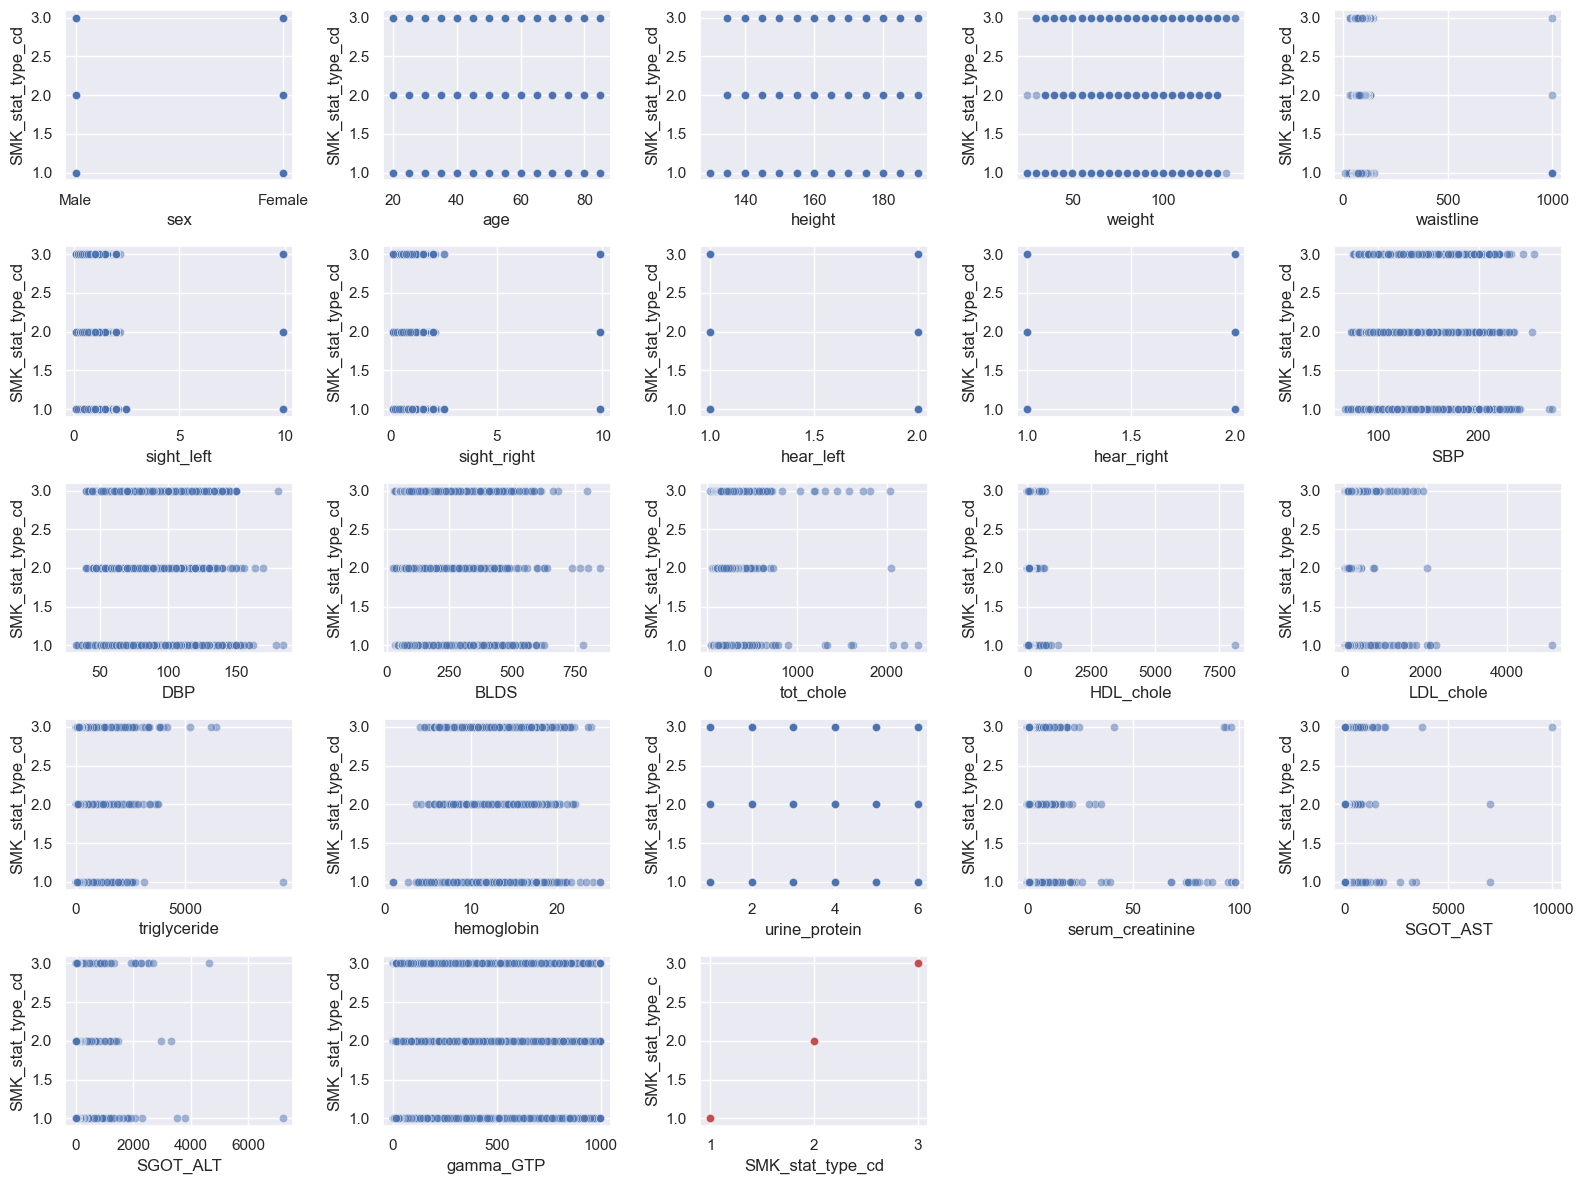

In [86]:
columns_to_check = df.columns[:-1]

num_rows = 5
num_cols = 5

num_plots = min(len(columns_to_check), num_rows * num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 12))

axes = axes.flatten()

sns.set(style="darkgrid")

for i in range(num_plots):
    column = columns_to_check[i]
    sns.scatterplot(data=df, x=column, y="SMK_stat_type_cd", alpha=0.5, ax=axes[i])
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("SMK_stat_type_cd")
    for i in range(num_plots):
     column = columns_to_check[i]
    sns.scatterplot(data=df, x=column, y="SMK_stat_type_cd", alpha=0.5, ax=axes[i])
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("SMK_stat_type_c")

for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()